In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir(str(Path('../')))

In [4]:
# from src import funcao

In [5]:
df = pd.read_csv(Path("data/vehicles.csv"))

In [6]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [8]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [9]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [10]:
df_fuel_query = df.query("fuel == 'gas'")[['model', 'condition']]

In [11]:
df_fuel_query.head()

,model,condition
0,bmw x5,good
1,ford f-150,good
2,hyundai sonata,like new
3,ford f-150,fair
4,chrysler 200,excellent


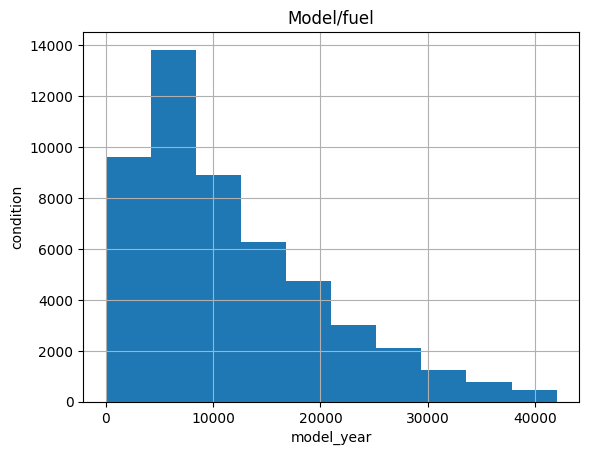

In [36]:
df.hist(column='price')
plt.xlabel('model_year')
plt.ylabel('condition')
plt.title('Model/fuel')
plt.show()

In [13]:
df_fuel_gas = df[(df['fuel'] == 'gas') & (df['condition'] == 'good')]

In [14]:
def cond_fuel(cond, fuel):
    df_fuel = df[df['fuel'] == fuel]
    df_cond = df_fuel[df_fuel['condition'] == cond]
    return df_cond['model'].head()

In [15]:
cond_fuel('good', 'gas')

0            bmw x5
1        ford f-150
21      toyota rav4
23    jeep wrangler
30     jeep liberty
Name: model, dtype: object

In [16]:
def dropar_dados(df, coluna, limite_dados_faltantes):
    if df[coluna].isna().mean() > limite_dados_faltantes:
       df = df.dropna(subset=[coluna])
    return df

In [17]:
media = df['price'].mean() # calculo da média
dp = df['price'].std() # desvio padrão
ls = media + 3*dp # limite superior (como não é uma curva normal fez a multiplicação por 2)
li = media - 3*dp # limite inferior
df = df[(df['price'] > li) & (df['price'] < ls)]

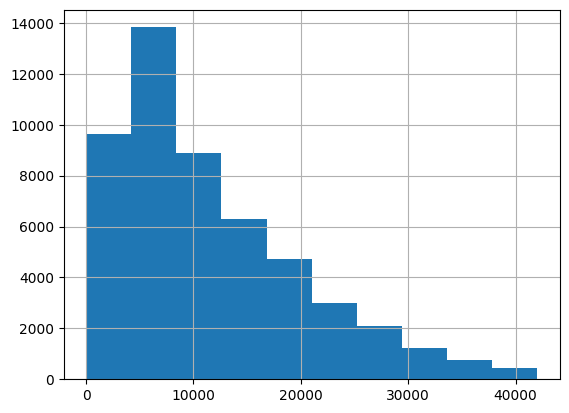

In [18]:
df['price'].hist();